In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

import pandas as pd
import numpy as np
import random
import networkx as nx
from IPython.display import Image
import matplotlib.pyplot as plt
import collections

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgvc6-plugins-gtk libxdot4
The following NEW packages will be installed:
  libgraphviz-dev libgvc6-plugins-gtk libxdot4
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 91.3 kB of archives.
After this operation, 425 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libxdot4 amd64 2.40.1-2 [15.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgvc6-plugins-gtk amd64 2.40.1-2 [18.2 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgraphviz-dev amd64 2.40.1-2 [57.3 kB]
Fetched 91.3 kB in 0s (1,113 kB/s)
Selecting previously unselected package libxdot4.
(Reading database ... 144487 files and 

In [ ]:
#Load the graph
merge = nx.read_graphml("./Networks_Challenge/merge2a.graphml")

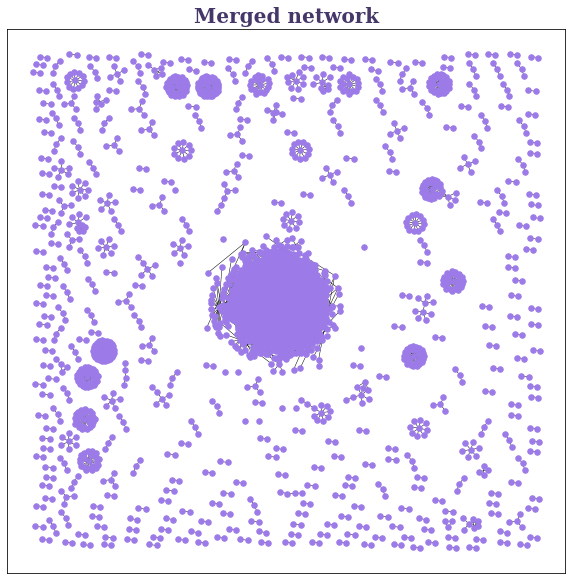

In [ ]:
pos = nx.nx_agraph.graphviz_layout(merge,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(merge, pos=pos, node_size=30, node_color='#9C7BE8')
nx.draw_networkx_edges(merge, pos=pos,width=0.5,arrows=False)
#Uncomment to label by node number
#nx.draw_networkx_labels(merge,pos=pos, font_size=8, alpha=1)
plt.title("Merged network", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()

In [ ]:
# Through some manipulation, you can rank the nodes by degree in a list of tuples
degree_count = sorted(merge.degree, key=lambda x: x[1], reverse=True)
# Prepare two tuples that you can plot against each other
node, degree = zip(*degree_count)
print(node[:50])
print(degree[:50])

('CYP3A4', 'MEOX2', 'CYSRT1', 'ABCB1', 'GOLGA2', 'CYP2D6', 'LNX1', 'KRTAP10-8', 'MDFI', 'WDYHV1', 'KRT40', 'KRT31', 'NOTCH2NL', 'NBPF19', 'CYP2C9', 'AES', 'PICK1', 'MTUS2', 'Fostamatinib', 'AQP6', 'TRAF2', 'HSF2BP', 'HOXA1', 'CYP1A2', 'CYP2C19', 'REL', 'TRIM27', 'ALB', 'KRTAP10-7', 'SDCBP', 'CYP2C8', 'KRT34', 'UBQLN2', 'HGS', 'FAM209A', 'TMEM14B', 'CYP3A5', 'MID2', 'USHBP1', 'INCA1', 'CEP70', 'RBPMS', 'ENKD1', 'GOLGA6L9', 'KRTAP10-9', 'DDIT4L', 'TFIP11', 'ERGIC3', 'KIFC3', 'ADAMTSL4')
(919, 641, 520, 409, 404, 384, 379, 374, 370, 367, 355, 343, 339, 339, 337, 323, 321, 311, 309, 304, 294, 292, 281, 279, 275, 275, 275, 274, 273, 269, 261, 254, 246, 239, 231, 231, 229, 226, 226, 225, 224, 216, 216, 215, 214, 208, 207, 205, 202, 197)


# Dexamethasone

In [ ]:
"Dexamethasone" in merge.nodes()

True

In [ ]:
import itertools

# Primeros vecinos
vecinos_Dexamethasone = [n for n in merge.neighbors("Dexamethasone") if merge.nodes(data=True)[n]["Bait_Boolean"] == 0 ]
print(vecinos_Dexamethasone)
print(len(vecinos_Dexamethasone))
# Vecinos segundos
#vecinos_2 = [i for i in list(merge.neighbors(n)) for n in vecinos_Dexamethasone if merge.nodes(data=True)[i]["Bait_Boolean"] == 0]
vecinos_2 = []
for n in vecinos_Dexamethasone:
  lista = list(merge.neighbors(n))
  for i in lista:
    if merge.nodes(data=True)[i]["Bait_Boolean"] == 0:
      vecinos_2.append(i)
print(vecinos_2)
print(len(vecinos_2))

# Vecinos terceros
vecinos_3 = []
for n in vecinos_2:
  lista = list(merge.neighbors(n))
  for i in lista:
    if merge.nodes(data=True)[i]["Bait_Boolean"] == 0:
      vecinos_3.append(i)
print(vecinos_3)
print(len(vecinos_3))

# Juntamos las 3 generaciones de vecinos (solo proteinas)
vecinos_Dexamethasone.extend(vecinos_2)
vecinos_Dexamethasone.extend(vecinos_3)
print(vecinos_Dexamethasone)
print(len(vecinos_Dexamethasone))



['ABCB1', 'ABCB11', 'ABCC2', 'ABCG2', 'ANXA1', 'CYP11A1', 'CYP17A1', 'CYP19A1', 'CYP1A1', 'CYP1B1', 'CYP2A6', 'CYP2B6', 'CYP2C19', 'CYP2C8', 'CYP2D6', 'CYP2E1', 'CYP3A4', 'CYP3A43', 'CYP3A5', 'CYP3A7', 'CYP4A11', 'NOS2', 'NR0B1', 'NR1I2', 'NR3C1', 'SLCO1A2']
26
['DDIT4L', 'LNPK', 'MEIS2', 'CMTM5', 'ESRRG', 'EEF2KMT', 'NR5A1']
7
['ABCB11', 'ACY3', 'AKT1', 'ASNA1', 'CALM1', 'CALM2', 'CALM3', 'CDA', 'CLK2', 'CLK3', 'CSK', 'DBI', 'DUSP23', 'EPHB6', 'FHIT', 'FLNA', 'GRB2', 'GUCA1A', 'HDAC7', 'IMPDH1', 'LGALS7', 'MT1M', 'NQO2', 'PADI6', 'PDE4C', 'PFKFB1', 'PPCDC', 'PRKAB2', 'PSMA1', 'PSMB9', 'PTS', 'RPIA', 'SNRPA', 'STK16', 'SULT2B1', 'SUOX', 'TXN', 'YES1', 'C12orf10', 'VEZF1', 'ZNF76', 'MAPRE3', 'GPKOW', 'LENG1', 'RNF8', 'LGALSL', 'LMO1', 'POU1F1', 'SEPT3', 'BAG4', 'TEKT4', 'MKRN3', 'C14orf119', 'CTNNA3', 'CCNH', 'MAPRE2', 'KCTD9', 'ZNF410', 'MLX', 'PARVG', 'EIF4A3', 'PM20D2', 'TCP11L1', 'MORF4L1', 'EIF4EBP1', 'KANK2', 'FHL2', 'KRT34', 'CALCOCO2', 'NUDT22', 'NDRG4', 'CTAG1B', 'CTAG1A', 'NME

In [ ]:
import pandas as pd
d = {'genes': vecinos_Dexamethasone}
df = pd.DataFrame(data=d)
df.to_csv("Genes_Dexamethasone.txt",index=False)

In [ ]:
vecinos_Dexamethasone.append("Dexamethasone")
subgraph_Dexamethasone = merge.subgraph(vecinos_Dexamethasone)


In [ ]:
# Node Colors
#subgraph_Dexamethasone.nodes(data=True)
dict_color={}
for node in subgraph_Dexamethasone.nodes():
  if (subgraph_Dexamethasone.nodes(data="Bait_Boolean")[node]==0):
    dict_color[node]="orange"
  else:
    dict_color[node]="green"
nx.set_node_attributes(subgraph_Dexamethasone, dict_color, 'node_color')
print(subgraph_Dexamethasone.nodes(data="node_color"))
node_colors=dict(subgraph_Dexamethasone.nodes(data="node_color")).values()

[('CTAG1A', 'orange'), ('VGLL1', 'orange'), ('FAM9A', 'orange'), ('ABCG2', 'orange'), ('SNX1', 'orange'), ('LMO1', 'orange'), ('ARFIP1', 'orange'), ('SGCB', 'orange'), ('RAB32', 'orange'), ('MKRN3', 'orange'), ('MTERF3', 'orange'), ('KRTAP6-1', 'orange'), ('CYP3A5', 'orange'), ('DHRSX', 'orange'), ('MEOX2', 'orange'), ('ALDH18A1', 'orange'), ('CPLX4', 'orange'), ('KCNK5', 'orange'), ('SUCLA2', 'orange'), ('ZNF620', 'orange'), ('TCF19', 'orange'), ('C9orf24', 'orange'), ('MRM1', 'orange'), ('CYP17A1', 'orange'), ('ABHD4', 'orange'), ('ABCB1', 'orange'), ('TRIM42', 'orange'), ('POU2AF1', 'orange'), ('CCNH', 'orange'), ('TUBB', 'orange'), ('FFAR2', 'orange'), ('TOLLIP', 'orange'), ('TXNL4A', 'orange'), ('KIAA1328', 'orange'), ('PLSCR4', 'orange'), ('HPRT1', 'orange'), ('PRKAB2', 'orange'), ('MLX', 'orange'), ('ZIC1', 'orange'), ('C8orf59', 'orange'), ('KCNJ6', 'orange'), ('ARPIN', 'orange'), ('PTK6', 'orange'), ('KRTAP10-8', 'orange'), ('NUDT2', 'orange'), ('PRPF40A', 'orange'), ('PICK1',

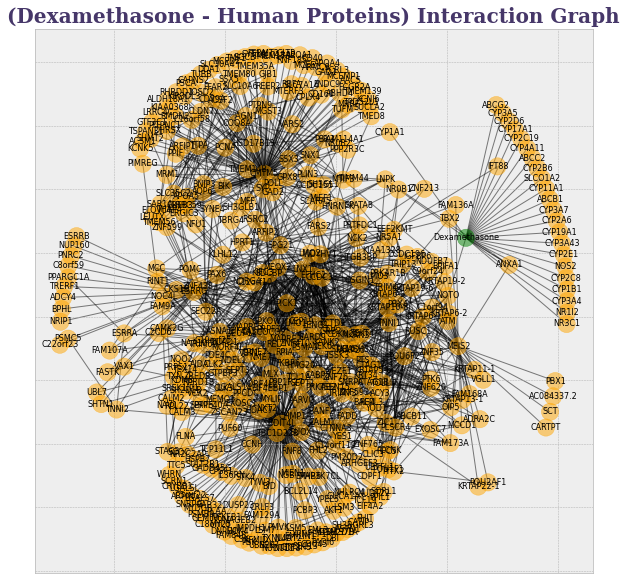

In [ ]:
pos = nx.nx_agraph.graphviz_layout(subgraph_Dexamethasone,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(subgraph_Dexamethasone, pos=pos,node_size=300,alpha=0.5,node_color=node_colors)
nx.draw_networkx_edges(subgraph_Dexamethasone, pos=pos,width=1,arrows=False,alpha=0.5)
#Uncomment to label by node number
nx.draw_networkx_labels(subgraph_Dexamethasone,pos=pos, font_size=8, alpha=1)
plt.title("(Dexamethasone - Human Proteins) Interaction Graph", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()


# Hydroxychloroquine

In [ ]:
"Hydroxychloroquine" in merge.nodes()
subgraph_Hydroxychloroquine.nodes(data=True)["Hydroxychloroquine"]

{'Bait_Boolean': 2,
 'class': 'small molecule',
 'name': 'Hydroxychloroquine',
 'node_color': 'green',
 'represents': 'drugbank:DB01611',
 'type': 'chemical'}

In [ ]:
import itertools

# Primeros vecinos
vecinos_Hydroxychloroquine = [n for n in merge.neighbors("Hydroxychloroquine") if merge.nodes(data=True)[n]["Bait_Boolean"] == 0 ]
print(vecinos_Hydroxychloroquine)
print(len(vecinos_Hydroxychloroquine))
# Vecinos segundos
#vecinos_2 = [i for i in list(merge.neighbors(n)) for n in vecinos_Dexamethasone if merge.nodes(data=True)[i]["Bait_Boolean"] == 0]
vecinos_2 = []
for n in vecinos_Hydroxychloroquine:
  lista = list(merge.neighbors(n))
  for i in lista:
    if merge.nodes(data=True)[i]["Bait_Boolean"] == 0:
      vecinos_2.append(i)
print(vecinos_2)
print(len(vecinos_2))

# Vecinos terceros
vecinos_3 = []
for n in vecinos_2:
  lista = list(merge.neighbors(n))
  for i in lista:
    if merge.nodes(data=True)[i]["Bait_Boolean"] == 0:
      vecinos_3.append(i)
print(vecinos_3)
print(len(vecinos_3))

# Juntamos las 3 generaciones de vecinos (solo proteinas)
vecinos_Hydroxychloroquine.extend(vecinos_2)
vecinos_Hydroxychloroquine.extend(vecinos_3)
print(vecinos_Hydroxychloroquine)
print(len(vecinos_Hydroxychloroquine))



['ABCB1', 'CYP2D6', 'TLR7', 'TLR9']
4
[]
0
[]
0
['ABCB1', 'CYP2D6', 'TLR7', 'TLR9']
4


In [ ]:
import pandas as pd
d = {'genes': list(vecinos_Dexamethasone)}
df = pd.DataFrame(data=d)
df.to_csv("Genes_Hydroxychloroquine.txt",index=False)

In [ ]:
vecinos_Hydroxychloroquine.append("Hydroxychloroquine")
subgraph_Hydroxychloroquine = merge.subgraph(vecinos_Hydroxychloroquine)

In [ ]:
subgraph_Hydroxychloroquine.nodes(data=True)

NodeDataView({'TLR7': {'name': 'TLR7', 'represents': 'uniprot:Q9NYK1', 'UniProt Name': 'Toll-like receptor 7', 'type': 'protein', 'Bait_Boolean': 0, 'node_color': 'orange'}, 'Hydroxychloroquine': {'name': 'Hydroxychloroquine', 'represents': 'drugbank:DB01611', 'type': 'chemical', 'class': 'small molecule', 'Bait_Boolean': 2, 'node_color': 'green'}, 'ABCB1': {'name': 'ABCB1', 'represents': 'uniprot:P08183', 'UniProt Name': 'Multidrug resistance protein 1', 'type': 'protein', 'Bait_Boolean': 0, 'node_color': 'orange'}, 'TLR9': {'name': 'TLR9', 'represents': 'uniprot:Q9NR96', 'UniProt Name': 'Toll-like receptor 9', 'type': 'protein', 'Bait_Boolean': 0, 'node_color': 'orange'}, 'CYP2D6': {'name': 'CYP2D6', 'represents': 'uniprot:P10635', 'UniProt Name': 'Cytochrome P450 2D6', 'type': 'protein', 'Bait_Boolean': 0, 'node_color': 'orange'}})

In [ ]:
# Node Colors
#subgraph_Hydroxychloroquine.nodes(data=True)
dict_color={}
for node in subgraph_Hydroxychloroquine.nodes():
  if (subgraph_Hydroxychloroquine.nodes(data="Bait_Boolean")[node]==0):
    dict_color[node]="orange"
  else:
    dict_color[node]="green"
nx.set_node_attributes(subgraph_Hydroxychloroquine, dict_color, 'node_color')
print(subgraph_Hydroxychloroquine.nodes(data="node_color"))
node_colors=dict(subgraph_Hydroxychloroquine.nodes(data="node_color")).values()

[('TLR7', 'orange'), ('Hydroxychloroquine', 'green'), ('ABCB1', 'orange'), ('TLR9', 'orange'), ('CYP2D6', 'orange')]


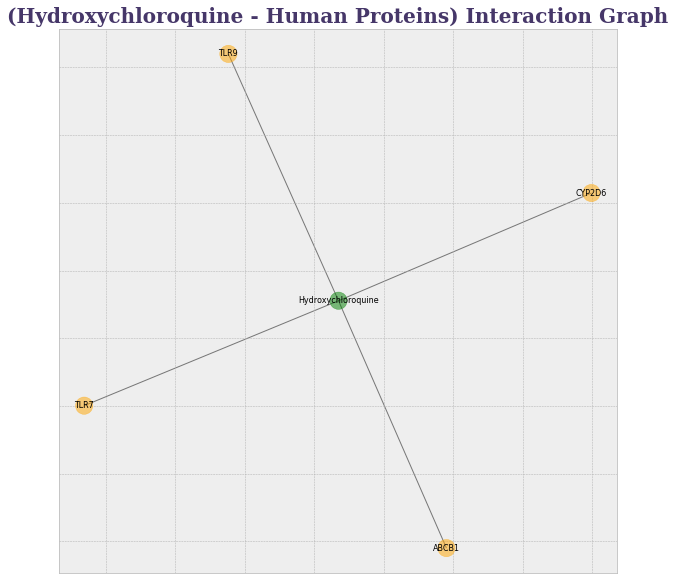

In [ ]:
pos = nx.nx_agraph.graphviz_layout(subgraph_Hydroxychloroquine,prog='neato')
# # Plot the graph
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(subgraph_Hydroxychloroquine, pos=pos,node_size=300,alpha=0.5,node_color=node_colors)
nx.draw_networkx_edges(subgraph_Hydroxychloroquine, pos=pos,width=1,arrows=False,alpha=0.5)
#Uncomment to label by node number
nx.draw_networkx_labels(subgraph_Hydroxychloroquine,pos=pos, font_size=8, alpha=1)
plt.title("(Hydroxychloroquine - Human Proteins) Interaction Graph", fontname='serif', fontsize=20, fontweight='bold', color='#463769')
plt.style.use('bmh') #ggplot, seaborn, bmh
plt.show()